22/11/2019

The code here is close to Nielsen. Each activation is treated as a column vector, even the last one which for XOR is just a simple number and is encloded in a shape (1,1) column vector of just one row, i.e if activation value of output neuron is a, then it is computed as np.array([[a]]).

Can easily adapt code here for the MLP excercises and the Iris classification problem.
But you may need to use more than 2 hidden neurons and more than 1 output neuron.

In [83]:
import numpy as np
import matplotlib.pyplot as plt

In [84]:
def sigm(z):
    return  1.0/(1.0 + np.exp(-z))

def sigm_deriv(z):
    a = sigm(z)
    return a*(1 - a)

In [85]:
class XOR_MLP:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 2 neurons
        self.w2 = np.random.randn(2,2)
        self.b2 = np.random.randn(2,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,2)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost
                
                
            
    

[[0.13441229 0.10816814 0.14522425 0.12453942]]
[[0.08467026 0.91859922 0.91853706 0.08963025]]


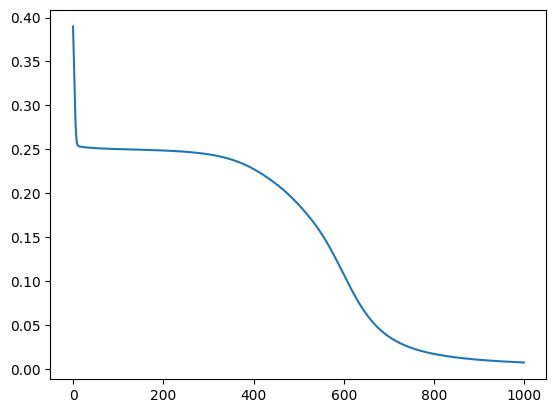

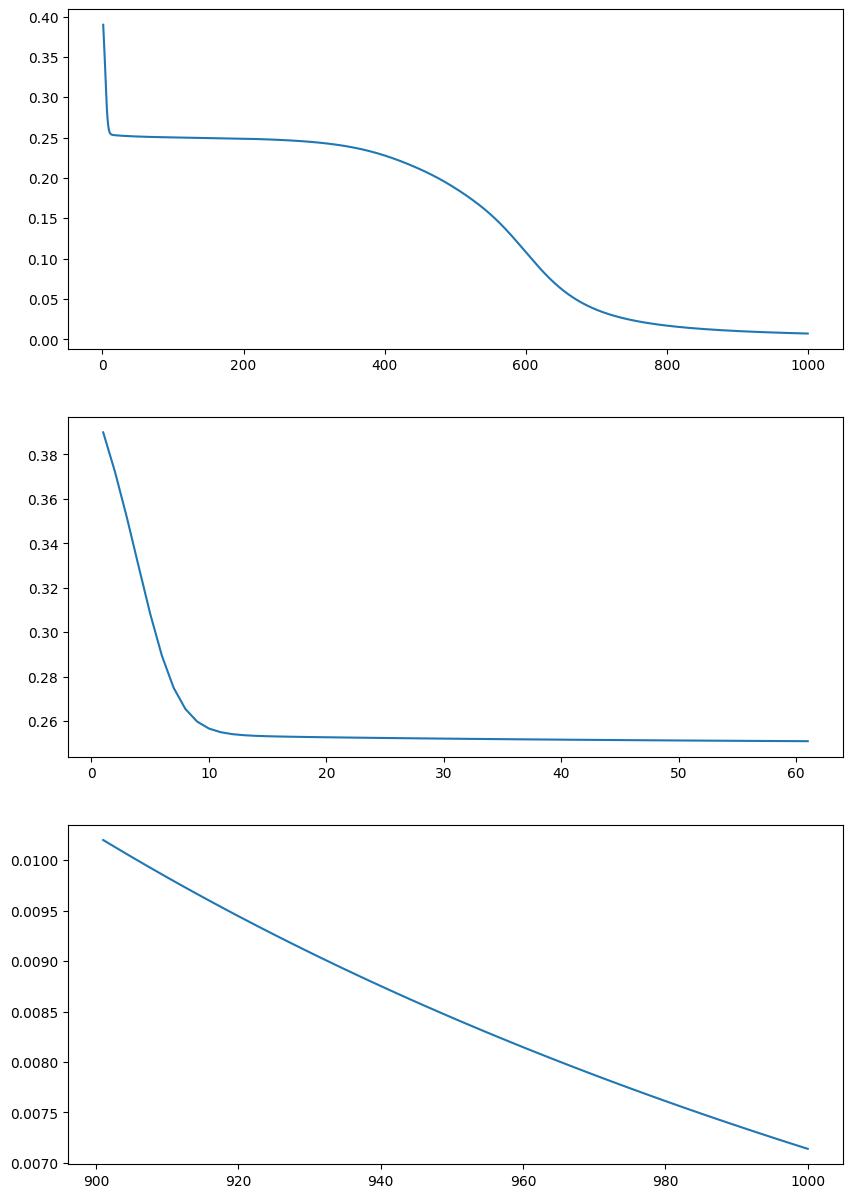

In [86]:
xor = XOR_MLP()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])





Exercise 1: copy and adapt the above XOR_MLP code so that it uses 3 neurons in the hidden layer. Train such a MLP and see if it learns faster than the previous one.

In [87]:
# Exercise 1
class XOR_MLP2:
    def __init__(self):
        self.train_inputs = np.array([[0,0], [0,1], [1,0], [1,1]])
        self.train_outputs = np.array([0,1,1,0])
          
        np.random.seed(23)
        # hidden layer of 3 neurons
        self.w2 = np.random.randn(3,2)
        self.b2 = np.random.randn(3,1)
        
        # output layer has 1 neuron
        self.w3 = np.random.randn(1,3)
        self.b3 = np.random.randn(1,1)
        

    def feedforward(self, xs):    
        # here xs is a matrix where each column is an input vector
        # w2.dot(xs) applies the weight matrix w2 to each input at once
        a2s = sigm(self.w2.dot(xs) + self.b2)
        a3s = sigm(self.w3.dot(a2s) + self.b3)            
        return a3s

    
    def backprop(self, xs, ys):   # Assumed here that input vectors are rows in xs
        del_w2 = np.zeros(self.w2.shape, dtype=float)
        del_b2 = np.zeros(self.b2.shape, dtype=float)
        
        del_w3 = np.zeros(self.w3.shape, dtype=float)
        del_b3 = np.zeros(self.b3.shape, dtype=float)
        cost = 0.0
        
        for x,y in zip(xs,ys):               # for zip to work, each x in xs must be a row vector
            a1 = x.reshape(2,1)              # convert input row vector x into (2,1) column vector
            z2 = self.w2.dot(a1) + self.b2   # so will z2 and a2
            a2 = sigm(z2)                    # column vector shape (2,1)
            
            z3 = self.w3.dot(a2) + self.b3   # a simple number in a (1,1) column vector
            a3 = sigm(z3)                    # so is a3
            
            delta3 = (a3-y) * sigm_deriv(z3)                   # delta3.shape is (1,1)
           
            delta2 = sigm_deriv(z2) * (self.w3.T.dot(delta3))  # w3 shape is (1,2), w3.T shape is (2,1)
                                                               # delta2 is shape (2,1)
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)  # shape (1,1) by (1,2) gives (1,2)
            
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)  # shape (2,1) by (1,2) gives (2,2)
        
           
            cost += ((a3 - y)**2).sum() 
        
        n = len(ys)  # number of training vectors    
        
        # get the average change per training input  
        # return the average adjustments to the biases and weights 
        # in each layer and the cost
        return del_b2/n, del_w2/n, del_b3/n, del_w3/n, cost/n
        
    def train(self, epochs, eta):
        xs = self.train_inputs
        ys = self.train_outputs
        cost = np.zeros((epochs,))
        
        for e in range(epochs):
            d_b2,d_w2,d_b3,d_w3, cost[e] = self.backprop(xs,ys)
                
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3
        plt.plot(cost)
        return cost


[[0.75101667 0.72275956 0.82197731 0.79600709]]
[[0.06170503 0.94737644 0.94695574 0.05410433]]


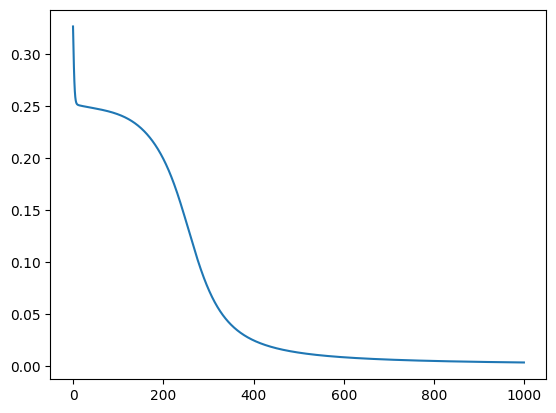

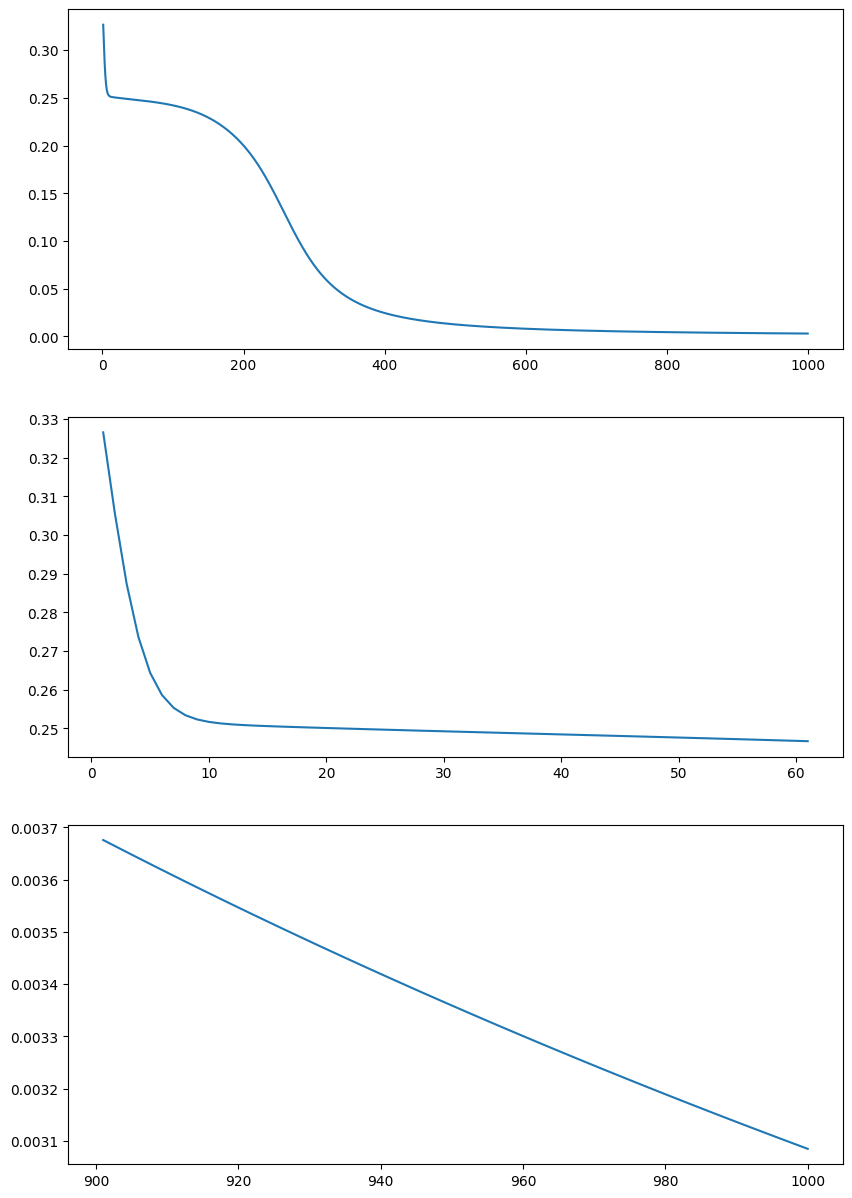

In [88]:
xor = XOR_MLP2()
xs = xor.train_inputs.T

print(xor.feedforward(xs))

epochs = 1000
c = xor.train(epochs, 3.0)

print(xor.feedforward(xs))

x_axis = np.linspace(1, epochs, epochs, dtype=int)
fig, axs = plt.subplots(3,1,figsize=(10,15))
plt.subplot(3,1,1)
plt.plot(x_axis, c)
plt.subplot(3,1,2)
plt.plot(x_axis[:61], c[:61])
plt.subplot(3,1,3)
plt.plot(x_axis[900:], c[900:])

In [104]:
# A more general purpose MLP with m input neurons, n hidden neurons and o output neurond
# You must complete this code yourself
class MLP:
    def __init__(self, m, n, o):
        np.random.seed(23)
        
        # Initialize weights and biases
        self.w2 = np.random.randn(n, m)  # Hidden layer weights n hidden, m inputs
        self.b2 = np.random.randn(n, 1)  # Hidden layer biases 
        
        self.w3 = np.random.randn(o, n)  # Output layer weights o outputs, n hidden layer inputs
        self.b3 = np.random.randn(o, 1)  # Output layer biases 

    def feedforward(self, xs):
        a2s = sigm(self.w2.dot(xs) + self.b2)  # Hidden layer activations
        a3s = sigm(self.w3.dot(a2s) + self.b3)  # Output layer activations
        return a3s

    def backprop(self, xs, ys):
        del_w2 = np.zeros_like(self.w2)
        del_b2 = np.zeros_like(self.b2)
        del_w3 = np.zeros_like(self.w3)
        del_b3 = np.zeros_like(self.b3)
        cost = 0.0

        for x, y in zip(xs.T, ys.T):
            a1 = x.reshape(-1, 1)  # Input as column vector
            y = y.reshape(-1, 1)  # Expected output as column vector
            
            # Feedforward
            z2 = self.w2.dot(a1) + self.b2  
            a2 = sigm(z2)                   # Hidden layer activation
            
            z3 = self.w3.dot(a2) + self.b3  
            a3 = sigm(z3)                   # Output layer activation
            
            # Backpropagation
            delta3 = (a3-y) * sigm_deriv(z3)     # Output layer error
            delta2 = (self.w3.T.dot(delta3)) * sigm_deriv(z2)  # Hidden layer error
            
            del_b3 += delta3
            del_w3 += delta3.dot(a2.T)
            del_b2 += delta2
            del_w2 += delta2.dot(a1.T)
            
            # Accumulate cost
            cost += ((a3 - y)**2).sum()

        n = xs.shape[1]  # Number of training samples
        return del_b2 / n, del_w2 / n, del_b3 / n, del_w3 / n, cost / n

    def train(self, train_inputs, train_outputs, epochs, eta):
        self.train_inputs = train_inputs
        self.train_outputs = train_outputs
        cost = np.zeros(epochs)

        for e in range(epochs):
            d_b2, d_w2, d_b3, d_w3, cost[e] = self.backprop(self.train_inputs, self.train_outputs)

            # Gradient descent step
            self.b2 -= eta * d_b2
            self.w2 -= eta * d_w2
            self.b3 -= eta * d_b3
            self.w3 -= eta * d_w3

        # Plot training cost
        plt.plot(range(epochs), cost)
        plt.title(f"Learning Rate: {eta}")
        plt.xlabel("Epochs")
        plt.ylabel("Cost")
        plt.show()

        return cost

    def predict(self, xs):
        outputs = self.feedforward(xs)
        return (outputs > 0.5).astype(int)  # Apply threshold to interpret as binary
                
         

In [90]:
# Are the outputs of these correct?
p1 = MLP(3,4,2)
print('\n W2 = \n',p1.w2, '\n W3 = \n', p1.w3, '\n')

p2 = MLP(4,6,3)
print('\n W2 = \n', p2.w2, '\nW3 = \n', p2.w3, '\n')



 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941]
 [ 0.94863382  0.70167179 -1.05108156]
 [-0.36754812 -1.13745969 -1.32214752]
 [ 1.77225828 -0.34745899  0.67014016]] 
 W3 = 
 [[ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 


 W2 = 
 [[ 0.66698806  0.02581308 -0.77761941  0.94863382]
 [ 0.70167179 -1.05108156 -0.36754812 -1.13745969]
 [-1.32214752  1.77225828 -0.34745899  0.67014016]
 [ 0.32227152  0.06034293 -1.04345    -1.00994188]
 [ 0.44173637  1.12887685 -1.83806777 -0.93876863]
 [-0.20184052  1.04537128  0.53816197  0.81211867]] 
W3 = 
 [[ 1.41531998  0.45771098  0.72887584  1.96843473 -0.54778801 -0.67941827]
 [-2.50623032  0.14696049  0.60619549 -0.02253889  0.01342226  0.93594489]
 [ 0.42062266  0.41161964 -0.07132392 -0.04543758  1.04088597 -0.09403473]] 




Training with Learning Rate: 0.1


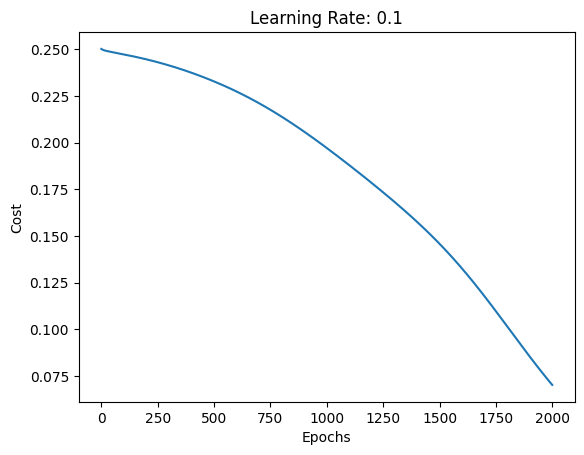

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 1
Input: [1 0 1], Predicted Output: 1
Input: [1 1 1], Predicted Output: 0

Training with Learning Rate: 0.3


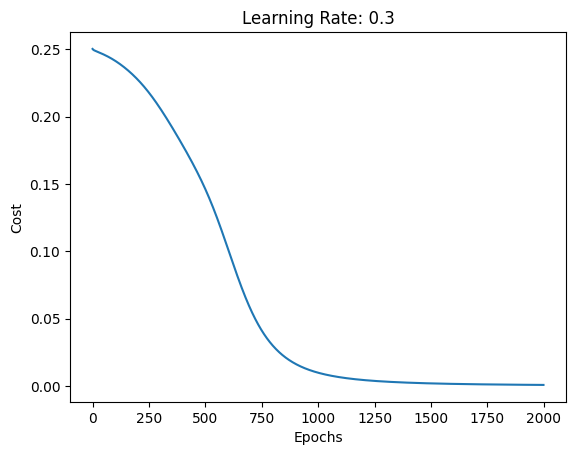

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 1
Input: [1 0 1], Predicted Output: 1
Input: [1 1 1], Predicted Output: 0

Training with Learning Rate: 0.5


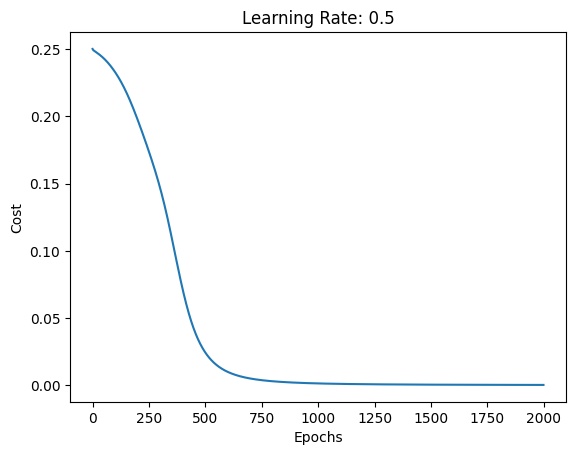

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 1
Input: [1 0 1], Predicted Output: 1
Input: [1 1 1], Predicted Output: 0

Training with Learning Rate: 1.0


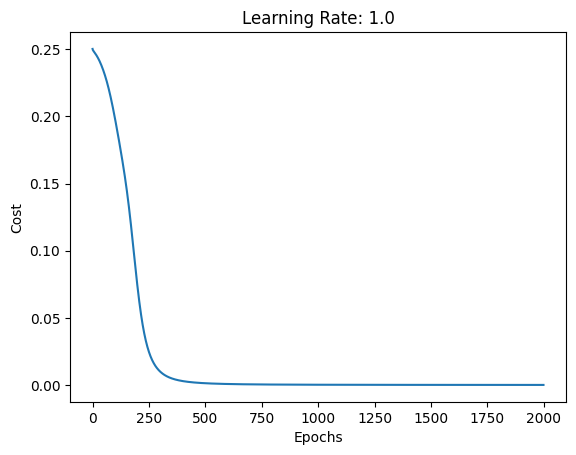

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 1
Input: [1 0 1], Predicted Output: 1
Input: [1 1 1], Predicted Output: 0

Training with Learning Rate: 5.0


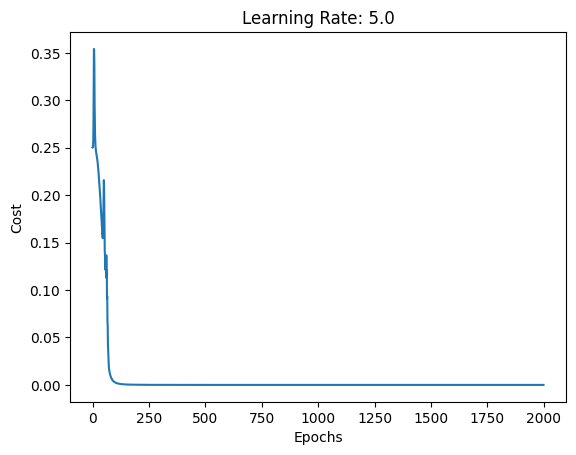

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 1
Input: [1 0 1], Predicted Output: 1
Input: [1 1 1], Predicted Output: 0

Training with Learning Rate: 10.0


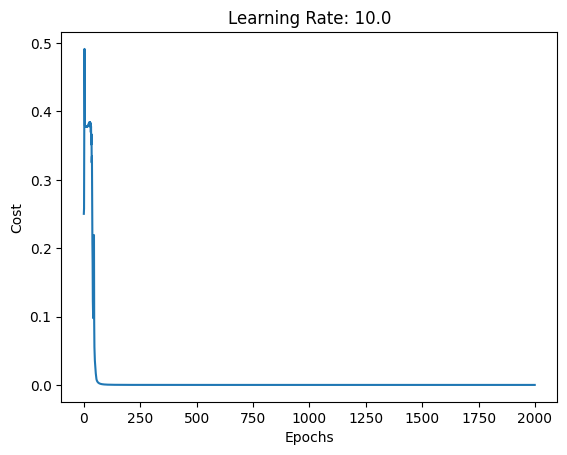

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 1
Input: [1 0 1], Predicted Output: 1
Input: [1 1 1], Predicted Output: 0

Training with Learning Rate: 20.0


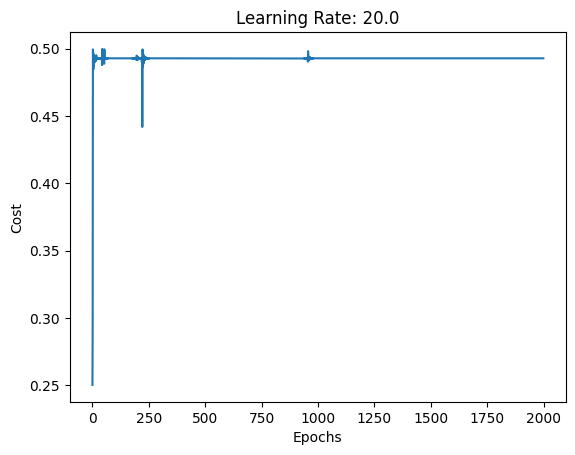

Input and Predicted Output:
Input: [0 0 1], Predicted Output: 0
Input: [0 1 1], Predicted Output: 0
Input: [1 0 1], Predicted Output: 0
Input: [1 1 1], Predicted Output: 0


In [91]:
# Problem 1

inputs = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 0, 1],
    [1, 1, 1]
]).T

outputs = np.array([
    [0],
    [1],
    [1],
    [0]
]).T

# Initialize the MLP
m = inputs.shape[0]  # input neurons 
n = 4                # hidden neurons 
o = outputs.shape[0]  # output neurons 

# Train the MLP with different learning rate
epochs = 2000
learning_rates = np.array([0.1, 0.3, 0.5, 1, 5, 10, 20])

for eta in learning_rates:
    # Reinitialize the MLP for each learning rate to reset weights and biases
    mlp = MLP(m, n, o)
    
    print(f"\nTraining with Learning Rate: {eta}")
    mlp.train(inputs, outputs, epochs, eta)
    
    # Test the MLP
    predictions = mlp.predict(inputs)
    
    # Print the predictions
    print("Input and Predicted Output:")
    for i in range(inputs.shape[1]):
        print(f"Input: {inputs[:, i]}, Predicted Output: {predictions[:, i][0]}")



Training MLP with 2 hidden neurons:


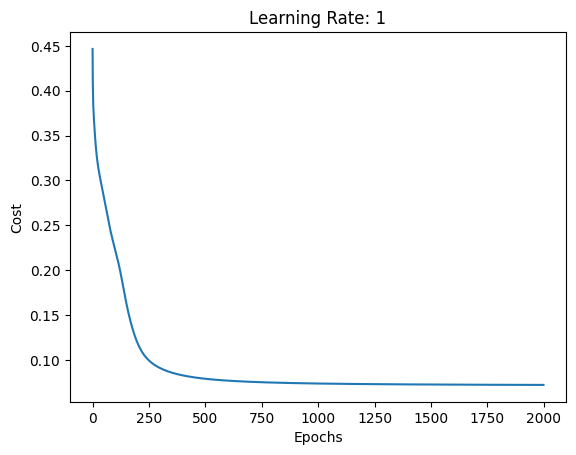

Input and Predicted Output:
Input: [1 1 0], Predicted Output: [1 0], Required output: [1 0]
Input: [ 1 -1 -1], Predicted Output: [0 1], Required output: [0 1]
Input: [-1  1  1], Predicted Output: [1 1], Required output: [1 1]
Input: [-1 -1  1], Predicted Output: [1 1], Required output: [1 0]
Input: [ 0  1 -1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0 -1 -1], Predicted Output: [1 1], Required output: [1 1]
Input: [1 1 1], Predicted Output: [1 1], Required output: [1 1]

Training MLP with 4 hidden neurons:


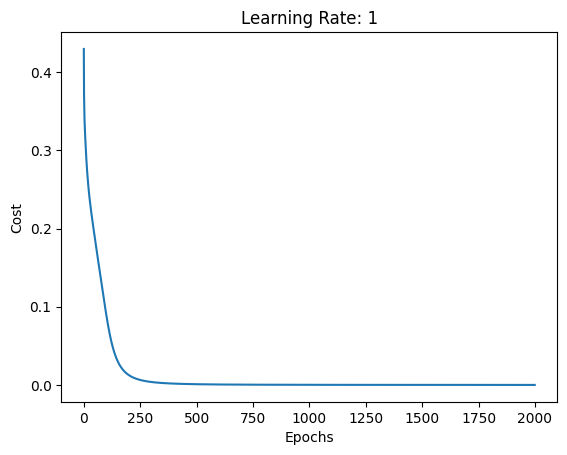

Input and Predicted Output:
Input: [1 1 0], Predicted Output: [1 0], Required output: [1 0]
Input: [ 1 -1 -1], Predicted Output: [0 1], Required output: [0 1]
Input: [-1  1  1], Predicted Output: [1 1], Required output: [1 1]
Input: [-1 -1  1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0  1 -1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0 -1 -1], Predicted Output: [1 1], Required output: [1 1]
Input: [1 1 1], Predicted Output: [1 1], Required output: [1 1]

Training MLP with 8 hidden neurons:


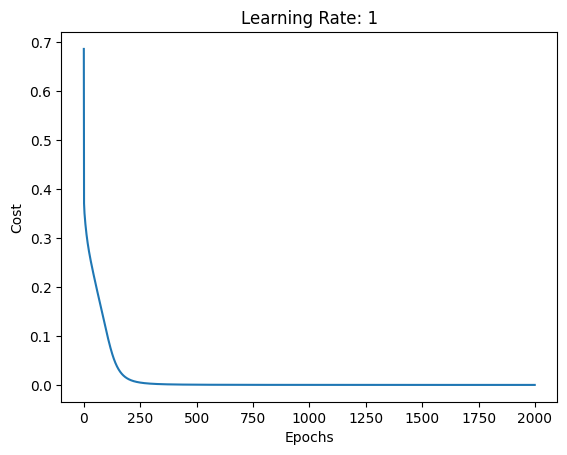

Input and Predicted Output:
Input: [1 1 0], Predicted Output: [1 0], Required output: [1 0]
Input: [ 1 -1 -1], Predicted Output: [0 1], Required output: [0 1]
Input: [-1  1  1], Predicted Output: [1 1], Required output: [1 1]
Input: [-1 -1  1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0  1 -1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0 -1 -1], Predicted Output: [1 1], Required output: [1 1]
Input: [1 1 1], Predicted Output: [1 1], Required output: [1 1]

Training MLP with 16 hidden neurons:


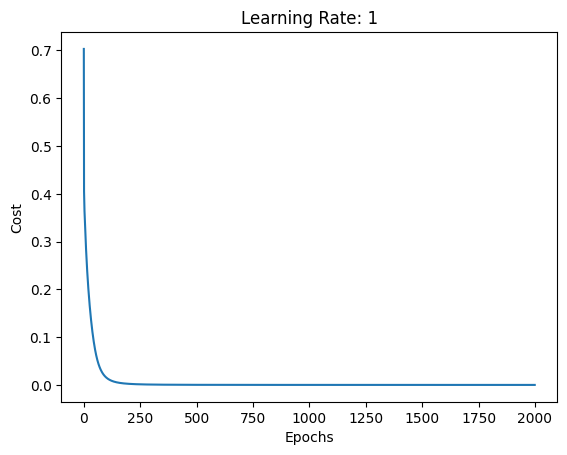

Input and Predicted Output:
Input: [1 1 0], Predicted Output: [1 0], Required output: [1 0]
Input: [ 1 -1 -1], Predicted Output: [0 1], Required output: [0 1]
Input: [-1  1  1], Predicted Output: [1 1], Required output: [1 1]
Input: [-1 -1  1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0  1 -1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0 -1 -1], Predicted Output: [1 1], Required output: [1 1]
Input: [1 1 1], Predicted Output: [1 1], Required output: [1 1]

Training MLP with 64 hidden neurons:


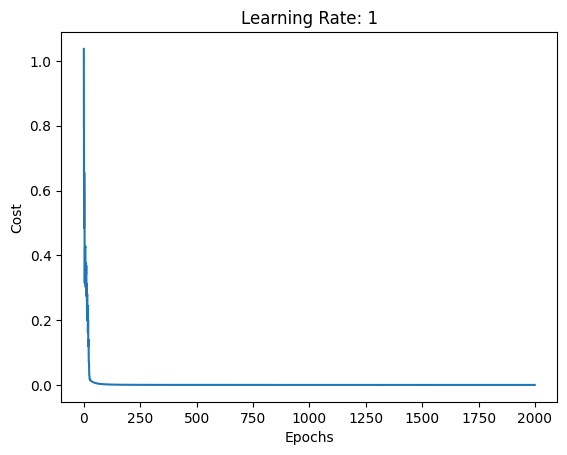

Input and Predicted Output:
Input: [1 1 0], Predicted Output: [1 0], Required output: [1 0]
Input: [ 1 -1 -1], Predicted Output: [0 1], Required output: [0 1]
Input: [-1  1  1], Predicted Output: [1 1], Required output: [1 1]
Input: [-1 -1  1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0  1 -1], Predicted Output: [1 0], Required output: [1 0]
Input: [ 0 -1 -1], Predicted Output: [1 1], Required output: [1 1]
Input: [1 1 1], Predicted Output: [1 1], Required output: [1 1]


In [92]:
#Problem 2
# Training data
X_training = np.array([
    [1, 1, 0],
    [1, -1, -1],
    [-1, 1, 1],
    [-1, -1, 1],
    [0, 1, -1],
    [0, -1, -1],
    [1, 1, 1]
]).T  

y_training = np.array([
    [1, 0],
    [0, 1],
    [1, 1],
    [1, 0],
    [1, 0],
    [1, 1],
    [1, 1]
]).T  

# Parameters
m = X_training.shape[0]  # input neurons 
o = y_training.shape[0]  # output neurons 

# Experiment with different hidden neurons
hidden_neurons_list = [2, 4, 8, 16, 64] 
epochs = 2000
eta = 1  

# Loop through different hidden layer configurations
for n in hidden_neurons_list:
    print(f"\nTraining MLP with {n} hidden neurons:")
    mlp = MLP(m, n, o)  
    mlp.train(X_training, y_training, epochs, eta)

    # Test the network
    predictions = mlp.predict(X_training)

    # Print predictions
    print("Input and Predicted Output:")
    for i in range(X_training.shape[1]):
        print(f"Input: {X_training[:, i]}, Predicted Output: {predictions[:, i]}, Required output: {y_training[:, i]}")



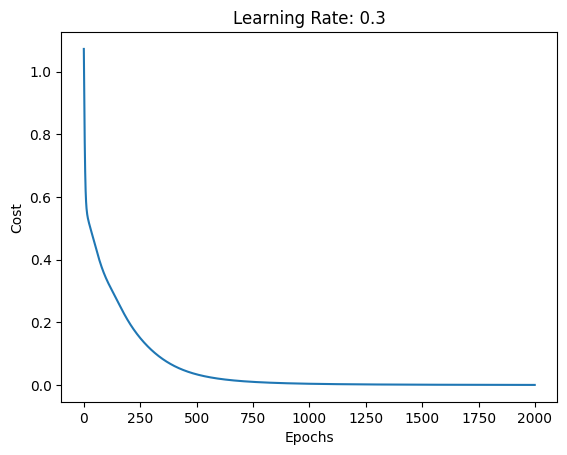

Predicted Transportation Mode: Car


In [93]:
# Problem 3
# Input data (gender, car ownership, travel cost, income level)
X_training = np.array([
    [0, 0, 0, 0],  # Male, 0 cars, Cheap, Low
    [0, 1, 0, 1],  # Male, 1 car, Cheap, Medium
    [1, 1, 0, 1],  # Female, 1 car, Cheap, Medium
    [1, 0, 0, 0],  # Female, 0 cars, Cheap, Low
    [0, 1, 0, 1],  # Male, 1 car, Cheap, Medium
    [0, 0, 1, 1],  # Male, 0 cars, Standard, Medium
    [1, 1, 1, 1],  # Female, 1 car, Standard, Medium
    [1, 0, 2, 2],  # Female, 0 cars, Expensive, High
    [0, 2, 2, 1],  # Male, 2 cars, Expensive, Medium
    [1, 2, 2, 2],  # Female, 2 cars, Expensive, High
])

# Output data (transportation mode: Bus, Train, Car)
Y_training = np.array([
    [1, 0, 0],  # Bus
    [1, 0, 0],  # Bus
    [0, 1, 0],  # Train
    [1, 0, 0],  # Bus
    [1, 0, 0],  # Bus
    [0, 1, 0],  # Train
    [0, 1, 0],  # Train
    [0, 0, 1],  # Car
    [0, 0, 1],  # Car
    [0, 0, 1],  # Car
])

# Initialize the MLP
m = X_training.shape[1]  # input neurons 
n = 4                    # hidden neurons 
o = Y_training.shape[1]  #output neurons 

mlp = MLP(m, n, o)

# Train the network
epochs = 2000
eta = 0.3
mlp.train(X_training.T, Y_training.T, epochs, eta)  # Transpose inputs and outputs for compatibility

# Predict for a new input
new_input = np.array([[1, 0, 2, 1]]).T  # Female, 0 cars, Expensive, Medium
prediction = mlp.predict(new_input)

# Interpret the prediction
classes = ["Bus", "Train", "Car"]
predicted_class = classes[np.argmax(prediction)]
print(f"Predicted Transportation Mode: {predicted_class}")


In [94]:
import pandas as pd

# Preprocessing the dataset
data = {
    "Gender": [1, 1, 0, 0, 1, 1, 0, 0, 1, 0],  # Male = 1, Female = 0
    "Car ownership": [0, 1, 1, 0, 1, 0, 1, 0, 2, 2],
    "Travel Cost": [0, 0, 0, 0, 0, 1, 1, 2, 2, 2],  # Cheap = 0, Standard = 1, Expensive = 2
    "Income Level": [0, 1, 1, 0, 1, 1, 1, 2, 1, 2],  # Low = 0, Medium = 1, High = 2
    "Transportation Mode": [0, 0, 1, 0, 0, 1, 1, 2, 2, 2]  # Bus = 0, Train = 1, Car = 2
}

df = pd.DataFrame(data)

# Prepare inputs and outputs
inputs = df[["Gender", "Car ownership", "Travel Cost", "Income Level"]].to_numpy().T
outputs = pd.get_dummies(df["Transportation Mode"]).to_numpy().T  # One-hot encode the output

# Save to transport.csv
df.to_csv("transport.csv", index=False)


In [2]:
# Problem 4
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset
df = pd.read_csv("iris_data.csv", header=None)
df.columns = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Species"]

inputs = df[["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]].to_numpy().T

# Encode target labels (Species)
encoder = LabelEncoder()
outputs = encoder.fit_transform(df["Species"])  # Convert species to numeric labels
outputs = pd.get_dummies(outputs).to_numpy().T  # Transpose to match shape (classes x samples)

# Import the MLP class 
m = inputs.shape[0]  # Number of input neurons 
n = 8                 # Number of hidden neurons 
o = outputs.shape[0]  # Number of output neurons 

mlp = MLP(m, n, o)

# Train the perceptron
epochs = 2000
eta = 0.3
mlp.train(inputs, outputs, epochs, eta)

# Test the perceptron
predictions = mlp.predict(inputs)

# Decode predictions back to species names
predicted_labels = [encoder.inverse_transform([np.argmax(predictions[:, i])])[0] for i in range(predictions.shape[1])]

# Decode actual labels
actual_labels = [encoder.inverse_transform([np.argmax(outputs[:, i])])[0] for i in range(outputs.shape[1])]

# Compare predictions with actual labels
#print("Predictions vs Actual Labels:")
#for i in range(len(actual_labels)):
#    print(f"Sample {i + 1}: Predicted - {predicted_labels[i]}, Actual - {actual_labels[i]}")


NameError: name 'MLP' is not defined

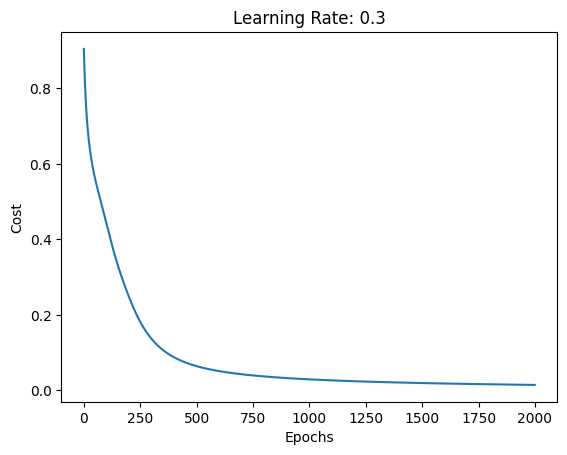

Predictions vs Actual Labels (Testing Subset):
Sample 1: Predicted - 1, Actual - 1
Sample 2: Predicted - 1, Actual - 1
Sample 3: Predicted - 3, Actual - 3
Sample 4: Predicted - 1, Actual - 1
Sample 5: Predicted - 2, Actual - 2
Sample 6: Predicted - 1, Actual - 1
Sample 7: Predicted - 2, Actual - 2
Sample 8: Predicted - 3, Actual - 3
Sample 9: Predicted - 2, Actual - 2
Sample 10: Predicted - 3, Actual - 3
Sample 11: Predicted - 1, Actual - 1
Sample 12: Predicted - 3, Actual - 3
Sample 13: Predicted - 1, Actual - 1
Sample 14: Predicted - 2, Actual - 2
Sample 15: Predicted - 1, Actual - 1
Sample 16: Predicted - 2, Actual - 2
Sample 17: Predicted - 2, Actual - 2
Sample 18: Predicted - 2, Actual - 2
Sample 19: Predicted - 1, Actual - 1
Sample 20: Predicted - 2, Actual - 2
Sample 21: Predicted - 1, Actual - 1
Sample 22: Predicted - 2, Actual - 2
Sample 23: Predicted - 2, Actual - 2
Sample 24: Predicted - 3, Actual - 3
Sample 25: Predicted - 3, Actual - 3
Sample 26: Predicted - 3, Actual - 3


In [106]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np

# Load the wine dataset (no header in the CSV)
df = pd.read_csv("wine_data.csv", header=None)

# Assign column names based on the description
df.columns = [
    "Class", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium",
    "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins",
    "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"
]

inputs = df.iloc[:, 1:].to_numpy().T  # Use columns 1-13 as inputs
scaler = StandardScaler()
inputs = scaler.fit_transform(inputs.T).T  # Standardize inputs

# Encode target labels (Class)
encoder = LabelEncoder()
outputs = encoder.fit_transform(labels)  
outputs = pd.get_dummies(outputs).to_numpy().T  # One-hot encode and transpose

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(inputs.T, outputs.T, test_size=0.2, random_state=42)

# Transpose the split data to match the perceptron input format
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

# Import the MLP class
m = X_train.shape[0]  # input neurons (13 features)
n = 16                # hidden neurons 
o = y_train.shape[0]  # output neurons (3 classes)

mlp = MLP(m, n, o)

# Train the perceptron
epochs = 2000
eta = 0.3
mlp.train(X_train, y_train, epochs, eta)

# Test the perceptron on the test set
predictions = mlp.predict(X_test)

# Decode predictions back to class labels
predicted_labels = [encoder.inverse_transform([np.argmax(predictions[:, i])])[0] for i in range(predictions.shape[1])]

# Decode actual labels
actual_labels = [encoder.inverse_transform([np.argmax(y_test[:, i])])[0] for i in range(y_test.shape[1])]

# Compare predictions with actual labels
print("Predictions vs Actual Labels (Testing Subset):")
for i in range(len(actual_labels)):
    print(f"Sample {i + 1}: Predicted - {predicted_labels[i]}, Actual - {actual_labels[i]}")

